<a href="https://colab.research.google.com/github/ethvedbitdesjan/vedaant-jain-sectioning-info-extraction/blob/main/title-detection-evaluation/DivideImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

In [ ]:
%cd /content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco

/content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco


In [ ]:
#!git clone unlim repo microsoft

In [ ]:
%cd unilm/dit

/content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco/unilm/dit


In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1

In [ ]:
!python -V

Python 3.8.10


In [ ]:
%cd /content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco/unilm/dit

/content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco/unilm/dit


In [ ]:
!pip install -r requirements.txt
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
!pip install -e .
!pip install shapely
%mkdir temp_apex1
%cd temp_apex1
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

In [ ]:
import detectron2

In [ ]:
!python -V

Python 3.8.10


In [ ]:
import sys
sys.path.append("/content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco/unilm")

In [ ]:
!pip install easyocr
!pip install -U sentence-transformers
!pip install datasets
!pip install transformers
!pip install accelerate
!pip install seqeval
!pip install evaluate

In [ ]:
!pip install gensim==3.6.0

In [ ]:
%cd /content/gdrive/MyDrive/Resume_Info_Extraction/SectionDivider

/content/gdrive/MyDrive/Resume_Info_Extraction/SectionDivider


In [ ]:
import SectionDivider

In [ ]:
import sys
sys.path.append("/content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco/unilm")

In [ ]:
%cd /content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco/

/content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco


In [ ]:
import os
import cv2

from unilm.dit.object_detection.ditod import add_vit_config

import torch

In [ ]:
from detectron2.config import CfgNode as CN
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
from detectron2.engine import DefaultPredictor

In [ ]:
cfg = get_cfg()
add_vit_config(cfg)
cfg.merge_from_file("/content/gdrive/MyDrive/Resume_Info_Extraction/annotated_coco/cascade_dit_base.yml")
#cfg.merge_from_list(['--opts', 'https://layoutlm.blob.core.windows.net/dit/dit-fts/publaynet_dit-b_mrcnn.pth'])

In [ ]:
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
predictor = DefaultPredictor(cfg)

In [ ]:
cfg

In [ ]:
def analyze_image(img):
    md = MetadataCatalog.get(cfg.DATASETS.TEST[0])
    if cfg.DATASETS.TEST[0]=='icdar2019_test':
        md.set(thing_classes=["table"])
    else:
        md.set(thing_classes=["text","title","list","table","figure"])
    
    output = predictor(img)["instances"]
    v = Visualizer(img[:, :, ::-1],
                    md,
                    scale=1.0,
                    instance_mode=ColorMode.SEGMENTATION)
    result = v.draw_instance_predictions(output.to("cpu"))
    result_image = result.get_image()[:, :, ::-1]
    
    return result_image, output.to("cpu")

In [ ]:
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# load the image
image = Image.open('/content/gdrive/MyDrive/Resume_Info_Extraction/title_annotated/images/4-1_d89e.jpg')
image = np.asarray(image)
# convert image to numpy array

In [ ]:
analysis, raw_output = analyze_image(image)

In [ ]:
preds = raw_output.pred_boxes
scores = raw_output.scores
classes = raw_output.pred_classes

In [ ]:
def _create_text_labels(classes, scores, class_names, is_crowd=None):
    """
    Args:
        classes (list[int] or None):
        scores (list[float] or None):
        class_names (list[str] or None):
        is_crowd (list[bool] or None):

    Returns:
        list[str] or None
    """
    labels = None
    if classes is not None:
        if class_names is not None and len(class_names) > 0:
            labels = [class_names[i] for i in classes]
        else:
            labels = [str(i) for i in classes]
    if scores is not None:
        if labels is None:
            labels = ["{:.0f}%".format(s * 100) for s in scores]
        else:
            labels = ["{} {:.0f}%".format(l, s * 100) for l, s in zip(labels, scores)]
    if labels is not None and is_crowd is not None:
        labels = [l + ("|crowd" if crowd else "") for l, crowd in zip(labels, is_crowd)]
    return labels

In [ ]:
labels = _create_text_labels(classes.tolist(), scores, ['text', 'title', 'list', 'table', 'figure'])

In [ ]:
def get_title_indices(classes, scores):
  title_indices = [i for i in range(len(classes)) if classes[i]==1]
  #confident_titles = 
  return [title_indices[i] for i in range(len(title_indices)) if scores[title_indices[i]] > 0.15]
  return confident_titles

In [ ]:
preds_np = preds.tensor.detach().numpy()

In [ ]:
title_indices = get_title_indices(classes.tolist(), scores)
print(title_indices, [scores[i] for i in range(len(title_indices))])

[4, 6, 10, 26, 27] [tensor(0.9919), tensor(0.9916), tensor(0.9558), tensor(0.9548), tensor(0.9151)]


In [ ]:
import easyocr
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
titles_list = ['ACADEMIC APPOINTMENTS', 'EDUCATION', 'RESEARCH INTERESTS', 'AWARDS, GRANTS AND HONORARY APPOINTMENTS', 'CITATION COUNT', 'COMPLETED RESEARCH ARTICLES', 'OTHER PUBLICATIONS (NON-PEER REVIEWED)', 'MEDIA COVERAGE'
                'CONSULTING EXPERIENCE', 'TEACHING EXPERIENCE', 'SEMINAR INVITATIONS', 'INVITED DISCUSSIONS AND LECTURES', 'CONFERENCE PRESENTATIONS', 'PROFESSIONAL SERVICE ', 'UNIVERSITY SERVICE',
                'COMMUNITY SERVICE', 'PROFESSIONAL EMPLOYMENT', 'RESEARCH', 'Journal Publications', 'Conference Publications', 'Working Papers', 'INVITED PRESENTATIONS', 'CONFERENCE PARTICIPATION','TEACHING',
                'CASE WRITING', 'RESEARCH FUNDING', 'PROFESSIONAL SERVICE', 'ACADEMIC HONORS, AWARDS, AND ACTIVITIES', 'PROGRAMMING / DATA SCIENCE', 'PERSONAL INTERESTS', 'Summary', 'OTHER SCHOLARLY ACTIVITIES', 'Student Engagement',
                'Curriculum Development', 'SERVICE', 'Industry Experience', 'Employment', 'Visiting Positions', 'Awards and Honors', 'Students Awards and Honors', 'Publications', 'Course Materials', 'Abstracts, Preprints, Presentations, Etc.',
                'Funding', 'Plenary Lectures and Invited Tutorials', 'Other Invited Workshop Talks', 'Invited Talks at Institutions', 'Course Development', 'Instruction', 'Mentorship', 'Students', 'Advising', 'Service', 'Professional', 'Activities', 'Posters', 'Patents']


titles_list = list(set([x.lower() for x in titles_list]))
print(len(titles_list))
model_sent = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
titles_embeddings = []
for title in titles_list:
      sent_embedding = model_sent.encode(title, convert_to_tensor=True)
      titles_embeddings.append(sent_embedding)
len(titles_embeddings)

In [ ]:
def ReadText(image, pred_bbox):
  pred_bbox_temp = pred_bbox
  image_pred = image[int(pred_bbox_temp[1]):int(pred_bbox_temp[3]), int(pred_bbox_temp[0]):int(pred_bbox_temp[2])]
  result = reader.readtext(image_pred)
  text = result[0][1]
  return text

In [ ]:
import pprint

In [ ]:
def CompareEvalTitles(target, titles_embeddings):
  phrases_similarity = []
  target = target.lower()
  target_embedding = model_sent.encode(target, convert_to_tensor=True)
  for idx, sent_embedding in enumerate(titles_embeddings):
    sim = util.pytorch_cos_sim(target_embedding, sent_embedding).item()
    phrases_similarity.append(sim)
  result = list(zip(phrases_similarity, titles_embeddings))
  result.sort(key=lambda item:item[0], reverse=True)
  result = result[:3]
  print("Target:", target, "\n", float(result[0][0]) > 0.65, result[0][0])
  #pprint.pprint(result)
  return float(result[0][0]) > 0.65

In [ ]:
def FilterTitleBboxes(preds_bboxes, img_half, image):
  print(img_half)
  pred_bboxes = [pred_bbox for pred_bbox in preds_bboxes if pred_bbox[0] < img_half]
  texts = [ReadText(image, pred_bbox) for pred_bbox in pred_bboxes]
  pred_bboxes = [pred_bboxes[i] for i in range(len(pred_bboxes)) if CompareEvalTitles(texts[i], titles_embeddings)]
  return pred_bboxes

1100.0
Target: education 
 True 1.0
Target: honors 
 True 0.8405987620353699
Target: publications 
 True 1.0
Target: cutticuumt 
 False 0.28780198097229004
Target: university of illinois at urbana-champaig 
 False 0.5147734880447388
[320.31815 328.17477 474.93323 364.61597]
[ 321.39212 1681.3684   433.56934 1718.1056 ]
[321.5482  589.49786 513.39514 625.494  ]


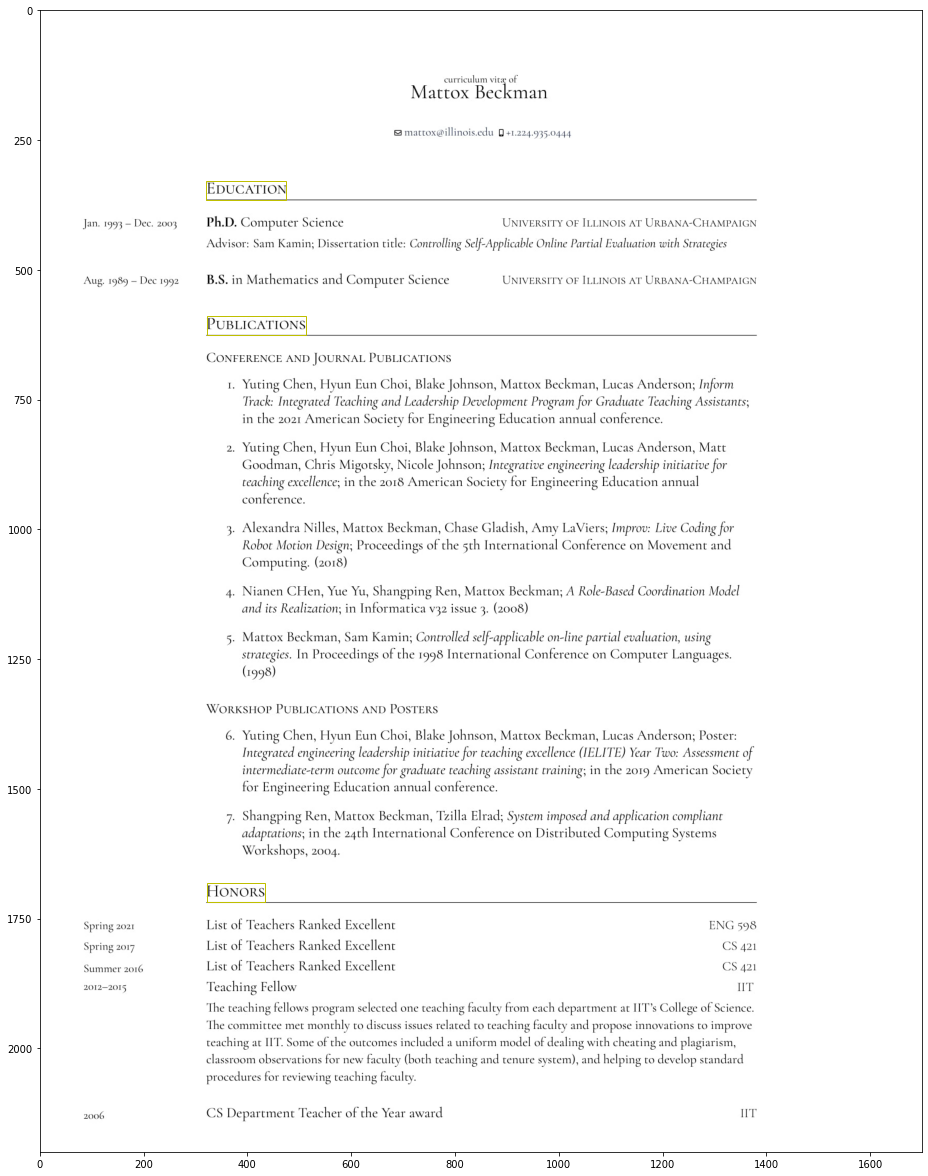

In [ ]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(19, 21))
ax.imshow(image)
preds_bboxes = [preds_np[i] for i in title_indices]
preds_bboxes = FilterTitleBboxes(preds_bboxes, image.shape[0]/2, image)
for pred_bbox in preds_bboxes:
  edge_colors = ['b', 'y']
  print(pred_bbox)
  rect = patches.Rectangle((pred_bbox[0], pred_bbox[1]),width = pred_bbox[2]-pred_bbox[0], height = pred_bbox[3]-pred_bbox[1],linewidth=1,edgecolor='y',facecolor='none')
  ax.add_patch(rect)

plt.show()

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim.downloader as api

# Load word2vec model (pre-trained on Google News)
model_wv2 = api.load('word2vec-google-news-300')

[=================================================-] 99.7% 1658.4/1662.8MB downloaded


In [ ]:
model_wv2['computer'].shape

(300,)

In [ ]:
model_wv2_vocab = set(model_wv2.vocab)
len(model_wv2_vocab)

3000000

In [ ]:
titles_list1 = ['ACADEMIC APPOINTMENTS', 'EDUCATION', 'RESEARCH INTERESTS', 'AWARDS, GRANTS AND HONORARY APPOINTMENTS', 'CITATION COUNT', 'COMPLETED RESEARCH ARTICLES', 'OTHER PUBLICATIONS', 'MEDIA COVERAGE'
                'CONSULTING EXPERIENCE', 'TEACHING EXPERIENCE', 'SEMINAR INVITATIONS', 'INVITED DISCUSSIONS AND LECTURES', 'CONFERENCE PRESENTATIONS', 'PROFESSIONAL SERVICE ',
                'COMMUNITY SERVICE', 'PROFESSIONAL EMPLOYMENT', 'RESEARCH', 'Journal Publications', 'Conference Publications', 'Working Papers', 'INVITED PRESENTATIONS', 'CONFERENCE PARTICIPATION','TEACHING',
                'CASE WRITING', 'RESEARCH FUNDING', 'ACADEMIC HONORS, AWARDS, AND ACTIVITIES', 'PROGRAMMING', 'PERSONAL INTERESTS', 'Summary', 'OTHER SCHOLARLY ACTIVITIES', 'Student Engagement',
                'Curriculum Development', 'SERVICE', 'Industry Experience', 'Employment', 'Visiting Positions', 'Awards and Honors', 'Students Awards', 'Publications', 'Course Materials', 'Abstracts, Preprints, Presentations',
                'Funding', 'Plenary Lectures', 'Invited Tutorials', 'Other Invited Workshop Talks', 'Invited Talks', 'Course Development', 'Instruction', 'Mentorship', 'Students', 'Advising', 'Service', 'Professional', 'Activities', 'Posters', 'Patents']

titles_list1 = list(set([x.lower() for x in titles_list1]))
len(titles_list1)
titles_embeddings1 = []
for title in titles_list1:
      title = title.replace(',','')
      words_list = title.split(' ')
      count = 0
      while count < len(words_list):
        if (words_list[count]) in model_wv2_vocab:
          total_vect = model_wv2[str(words_list[count])].copy()
          break
        count += 1
      for i in range(count, len(words_list)):
        if words_list[i] in model_wv2_vocab:
          total_vect += model_wv2[str(words_list[i])]
      titles_embeddings1.append(total_vect)
len(titles_embeddings1)

54

In [ ]:
import pprint

In [ ]:
from numpy import dot
from numpy.linalg import norm

In [ ]:
def CompareEvalTitlesW2V(target, titles1):
  phrases_similarity = []
  target = target.lower()
  target = target.replace(',','')
  target_words_list = target.split(' ')
  count = 0
  total_vect = None
  while count < len(target_words_list):
    if (target_words_list[count]) in model_wv2_vocab:
      total_vect = model_wv2[str(target_words_list[count])].copy()
      break
    count += 1
  for i in range(count, len(target_words_list)):
    if target_words_list[i] in model_wv2_vocab:
      total_vect += model_wv2[str(target_words_list[i])]
  if total_vect is None:
    print(target, target_words_list, count)
    return False
  target_embedding = total_vect.copy()
  for idx, sent_embedding in enumerate(titles1):
    sent_embedding = titles_embeddings1[idx]
    sim = dot(target_embedding, sent_embedding)/(norm(target_embedding)*norm(sent_embedding))
    phrases_similarity.append(sim)
  result = list(zip(phrases_similarity, titles1))
  result.sort(key=lambda item:item[0], reverse=True)
  result = result[:3]
  print("Target:", target, "\n", float(result[0][0]) > 0.65, result[0])
  #pprint.pprint(result)
  return float(result[0][0]) > 0.65

In [ ]:
def FilterTitleBboxesW2V(preds_bboxes, img_half, image):
  print(img_half)
  pred_bboxes = [pred_bbox for pred_bbox in preds_bboxes if pred_bbox[0] < img_half]
  texts = [ReadText(image, pred_bbox) for pred_bbox in pred_bboxes]
  pred_bboxes = [pred_bboxes[i] for i in range(len(pred_bboxes)) if CompareEvalTitlesW2V(texts[i], titles_list1)]
  return pred_bboxes

In [ ]:
"""
def SimilarityRank(list1, list2):
  phrases_similarity = []
  for i, phrase in enumerate(list1):
    phrase_similarity = np.zeros(len(list2))
    target_words = [w for w in phrase.split() if w in model_wv2_vocab]
    for idx, sentence in enumerate(list2):
      sentence_words = [w for w in sentence.split() if w in model_wv2_vocab]
      sim = model_wv2.n_similarity(target_words, sentence_words)
      phrase_similarity[idx] = sim
    result = list(zip(phrase_similarity, list2))
    result.sort(key=lambda item:item[0], reverse=True)
    result = result[:3]
    print("Target:", phrase)
    pprint.pprint(result)
    phrases_similarity.append(phrase_similarity)
  return phrases_similarity
"""

'\ndef SimilarityRank(list1, list2):\n  phrases_similarity = []\n  for i, phrase in enumerate(list1):\n    phrase_similarity = np.zeros(len(list2))\n    target_words = [w for w in phrase.split() if w in model_wv2_vocab]\n    for idx, sentence in enumerate(list2):\n      sentence_words = [w for w in sentence.split() if w in model_wv2_vocab]\n      sim = model_wv2.n_similarity(target_words, sentence_words)\n      phrase_similarity[idx] = sim\n    result = list(zip(phrase_similarity, list2))\n    result.sort(key=lambda item:item[0], reverse=True)\n    result = result[:3]\n    print("Target:", phrase)\n    pprint.pprint(result)\n    phrases_similarity.append(phrase_similarity)\n  return phrases_similarity\n'

In [ ]:
for word in ['teaching', 'academic positions', 'fellowships, & awards', 'research interests', 'university of illinois, urbana-champaign', 'ph.d. advisees', 'undergraduate mentees']:
  print(CompareEvalTitlesW2V(word, titles_list1))

Target: teaching 
 True (1.0000001, 'teaching')
True
Target: academic positions 
 True (0.85018444, 'academic appointments')
True
Target: fellowships & awards 
 True (0.70420694, 'awards, grants and honorary appointments')
True
Target: research interests 
 True (1.0, 'research interests')
True
Target: university of illinois urbana-champaign 
 False (0.50313896, 'academic appointments')
False
Target: ph.d. advisees 
 False (0.4541614, 'academic appointments')
False
Target: undergraduate mentees 
 False (0.63569915, 'students')
False


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transformers
from transformers import BertTokenizer, BertModel
import torch
from scipy.spatial.distance import cosine

In [ ]:
from transformers import AutoTokenizer, AutoModel

In [ ]:
def divide_image(image, boxes):
  sections = []
  boxes = sorted(boxes, key = lambda x:x[1])
  if len(boxes) > 0:
    sections = []
  else:
    return [image]
  if len(boxes) >= 1:
    sections.append(image[0:int(boxes[0][1]), :])
  for i in range(1, len(boxes)):
    sections.append(image[int(boxes[i-1][1]):int(boxes[i][1]), :])
  sections.append(image[int(boxes[-1][1]):, :])
  return sections

In [ ]:
def GetBboxes(title_indices, preds_np):
  sections = []
  boxes = []
  for result_idx in title_indices:
    boxes.append([preds_np[result_idx][0], preds_np[result_idx][1], preds_np[result_idx][2]-preds_np[result_idx][0], preds_np[result_idx][3]-preds_np[result_idx][1]])
  boxes = sorted(boxes, key = lambda x:x[1])
  return boxes

In [ ]:
print(title_indices)
preds[6], preds[8]

[4, 6, 10, 26, 27]


(Boxes(tensor([[ 321.3921, 1681.3684,  433.5693, 1718.1056]])),
 Boxes(tensor([[ 310.6902,  394.7220, 1370.5249,  468.3751]])))

In [ ]:
import math

In [ ]:
pred_boxes = [preds_np[title_indices[i]] for i in range(len(title_indices))]
pred_boxes = FilterTitleBboxes(pred_boxes, image.shape[0]/2, image)

1100.0
Target: education 
 True 1.0
Target: honors 
 True 0.8405987620353699
Target: publications 
 True 1.0
Target: cutticuumt 
 False 0.28780198097229004
Target: university of illinois at urbana-champaig 
 False 0.5147734880447388


(4,)


<ipython-input-51-b6092dd8508a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(sections).shape)


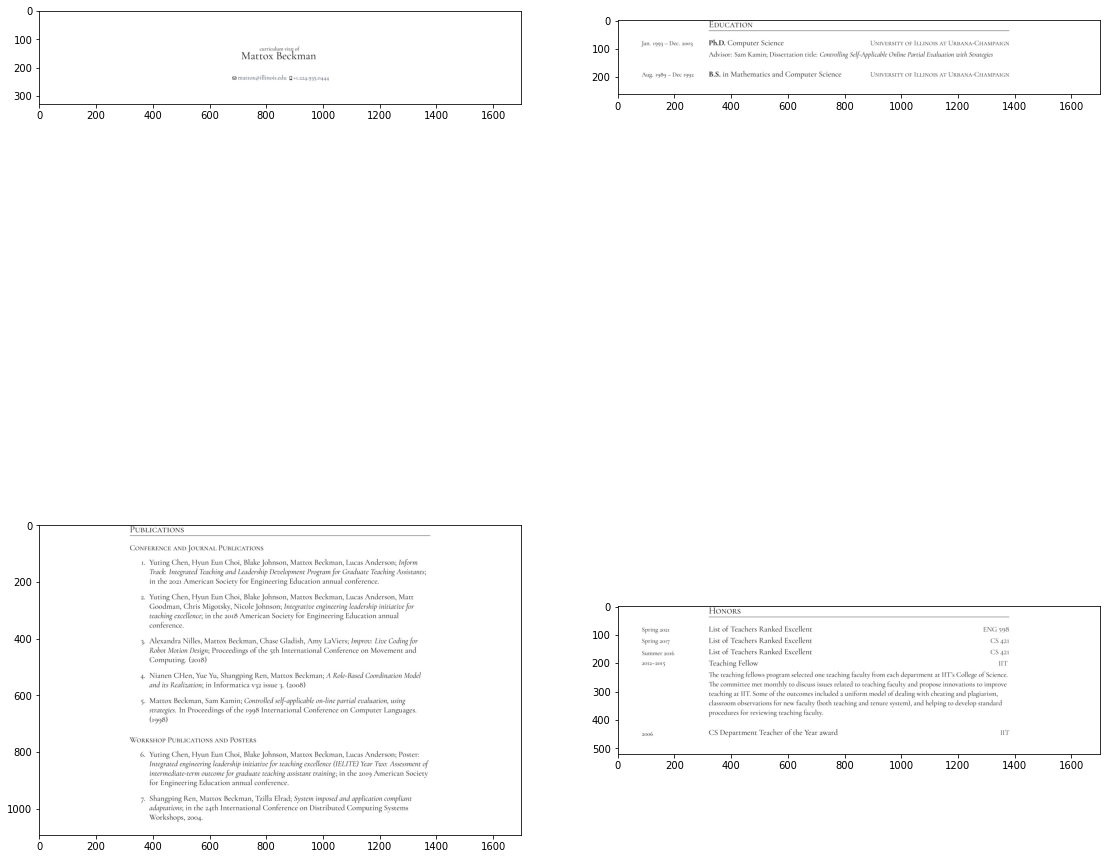

In [ ]:
sections = divide_image(image, pred_boxes)
print(np.array(sections).shape)
fig, axes = plt.subplots(2, math.ceil(len(sections)/2), figsize=(19, 21))
axes = np.ravel(axes)
for i, section in enumerate(sections):
  axes[i].imshow(section)

plt.show()

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


[1, 4, 6, 8, 12] [tensor(0.9769), tensor(0.9695), tensor(0.9583), tensor(0.9535), tensor(0.9157)]
1100.0
Target: research interests 
 True 1.0
Target: academic appointments 
 True 1.0
Target: education 
 True 1.0
Target: ramnatthan alagappan 
 False 0.2454478144645691
Target: honors & awards 
 True 0.9458903074264526
(5,)


<ipython-input-52-a758a9d6d874>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(sections).shape)


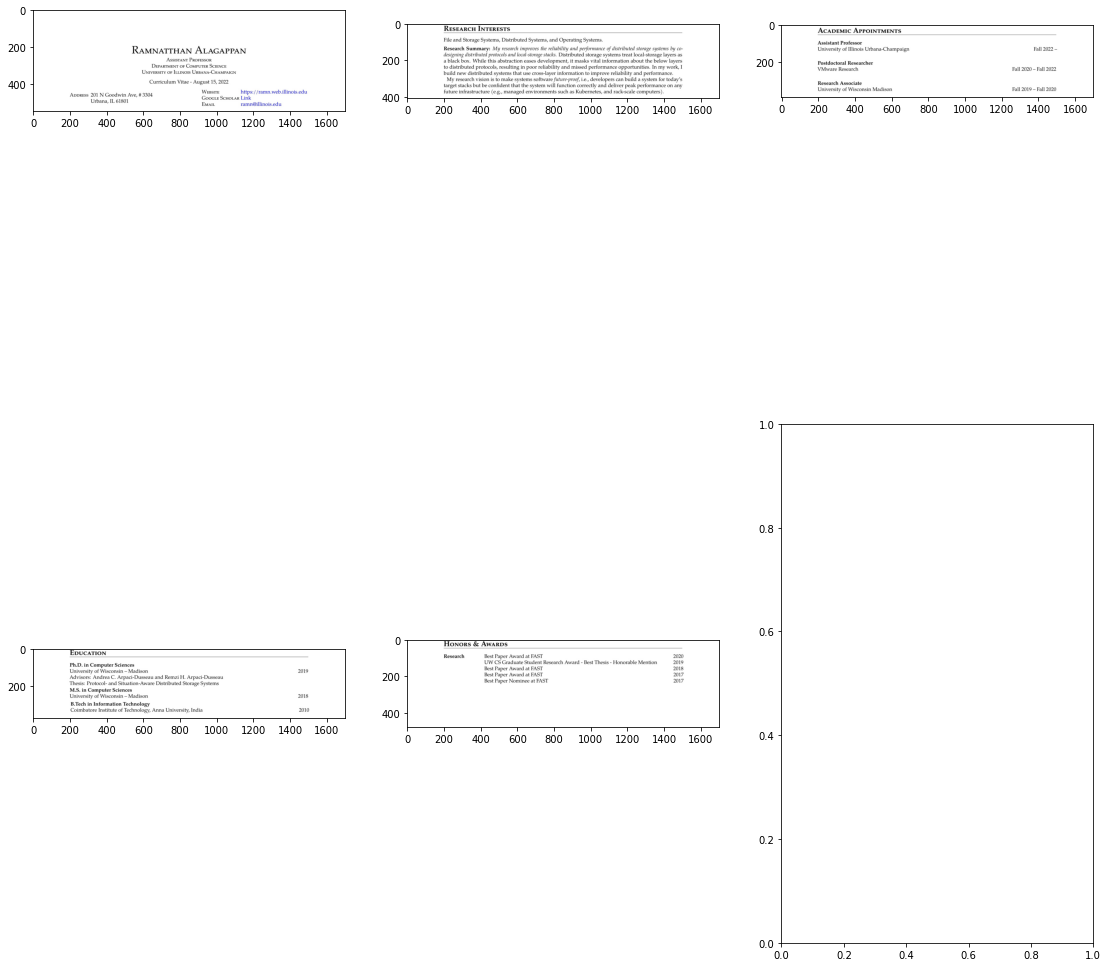

In [ ]:
image = Image.open('/content/gdrive/MyDrive/Resume_Info_Extraction/title_annotated/images/1-1_cd91.jpg')
image = np.asarray(image)

analysis, raw_output = analyze_image(image)
preds = raw_output.pred_boxes
scores = raw_output.scores
classes = raw_output.pred_classes
labels = _create_text_labels(classes.tolist(), scores, ['text', 'title', 'list', 'table', 'figure'])
preds_np = preds.tensor.detach().numpy()

title_indices = get_title_indices(classes.tolist(), scores)
print(title_indices, [scores[i] for i in range(len(title_indices))])
pred_boxes = [preds_np[title_indices[i]] for i in range(len(title_indices))]
pred_boxes = FilterTitleBboxes(pred_boxes, image.shape[0]/2, image)
sections = divide_image(image, pred_boxes)
print(np.array(sections).shape)
fig, axes = plt.subplots(2, math.ceil(len(sections)/2), figsize=(19, 21))
axes = np.ravel(axes)
for i, section in enumerate(sections):
  axes[i].imshow(section)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(19, 21))
ax.imshow(analysis)

In [ ]:
#torch.save(predictor, 'model_save/model.pt')

In [ ]:
model = torch.load('model_save/model.pt')

In [ ]:
model(image)

In [ ]:
model1 = DefaultPredictor(cfg)
model1 = torch.load('model_save/model.pt')

In [ ]:
output = model1(image)["instances"]

In [ ]:
%cd ..

/content/gdrive/MyDrive/Resume_Info_Extraction


In [ ]:
#!git clone https://github.com/cocodataset/cocoapi.git

In [ ]:
#!make

In [ ]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [ ]:
import skimage.io as io

In [ ]:
%cd /content/gdrive/MyDrive/Resume_Info_Extraction

/content/gdrive/MyDrive/Resume_Info_Extraction


In [ ]:
%cd title_annotated

/content/gdrive/MyDrive/Resume_Info_Extraction/title_annotated


In [ ]:
annotation_type = 'bbox'
annotation_file = 'result.json'
coco=COCO(annotation_file)

loading annotations into memory...
Done (t=1.01s)
creating index...
index created!


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
Title



In [ ]:
catIds = coco.getCatIds(catNms=['Title']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [1])
rand_int = np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds[rand_int])[0]

In [ ]:
def intersection_over_union(gt_box, pred_box):
    inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
    inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]

    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

    intersection = inter_box_w * inter_box_h
    union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection
    
    iou = intersection / union

    return iou, intersection, union

In [ ]:
intersection_over_union([203.04449648711943, 557.9710144927536, 366.2763466042154, 39.85507246376812], [202.1621, 551.1343, 564.3277, 608.328])

(0.042522941810309856, 14597.970335675254, 343296.3410856)

In [ ]:
def ConvertToWidthHeight(pred_box):
  new_pred_box = pred_box.copy()
  new_pred_box[2] = pred_box[2]-pred_box[0]
  new_pred_box[3] = new_pred_box[3] - new_pred_box[1]
  return new_pred_box

In [ ]:
iou_thr = 0.3
img_results = []
for imgId in coco.getImgIds(catIds=catIds)[:-3]:
    imgIds = coco.getImgIds(imgIds = [imgId])
    img = coco.loadImgs(imgIds[0])[0]
    img['file_name'] = img['file_name'].replace('\\', '/')
    try:
      image = Image.open(img['file_name'])
    except:
      continue
    image = np.asarray(image)

    analysis, raw_output = analyze_image(image)
    preds = raw_output.pred_boxes
    scores = raw_output.scores
    classes = raw_output.pred_classes
    labels = _create_text_labels(classes.tolist(), scores, ['text', 'title', 'list', 'table', 'figure'])
    preds_np = preds.tensor.detach().numpy()
    title_indices = get_title_indices(classes.tolist(), scores)
    pred_boxes = [preds_np[title_indices[i]] for i in range(len(title_indices))]
    pred_boxes = FilterTitleBboxes(pred_boxes, image.shape[0]/2, image)
    pred_boxes = [ConvertToWidthHeight(pred_box) for pred_box in pred_boxes]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    ann_bboxes = [ann['bbox'] for ann in anns]
    ann_bboxes = sorted(ann_bboxes, key = lambda x:x[1])
    print(ann_bboxes, pred_boxes, img['file_name'])
    gt_idx_thr=[]
    pred_idx_thr=[]
    ious=[]
    add_anns = []
    for i in range(len(pred_boxes)):
      for j in range(len(ann_bboxes)):
        iou, intersect, union = intersection_over_union(ann_bboxes[j], pred_boxes[i])
        if iou >= iou_thr:
          gt_idx_thr.append(j)
          pred_idx_thr.append(i)
          ious.append(iou)
    iou_sort = np.argsort(ious)[::1]
    if len(iou_sort) == 0:
      img_results.append({'tp':0, 'fp':0, 'fn':0})
      continue
    print(ious)
    gt_match_idx = []
    pred_match_idx = []
    for i in iou_sort:
      gt_idx = gt_idx_thr[i]
      pred_idx = gt_idx_thr[i]
      if (gt_idx not in gt_match_idx) and (pred_match_idx not in pred_match_idx):
        gt_match_idx.append(gt_idx)
        pred_match_idx.append(pred_idx)
    for i in range(len(ann_bboxes)):
      if i not in gt_match_idx:
        print(i, ann_bboxes[i])
    img_results.append({'tp':len(gt_match_idx), 'fp':len(pred_boxes) - len(pred_match_idx), 'fn':len(ann_bboxes) - len(gt_match_idx)})           

In [ ]:
def PrecisionAndRecallCalc(img_results):
  tp = 0
  fp = 0
  fn = 0
  for i, result in enumerate(img_results):
    print(result)
    tp += result['tp']
    fp += result['fp']
    fn += result['fn']
  fn -=3
  try:
      precision = tp/(tp+ fp)
  except ZeroDivisionError:
      precision=0.0
  try:
      recall = tp/(tp + fn)
  except ZeroDivisionError:
      recall=0.0
  return (precision, recall)

In [ ]:
PrecisionAndRecallCalc(img_results)

{'tp': 4, 'fp': 0, 'fn': 1}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 0, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 1}
{'tp': 0, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 2}
{'tp': 2, 'fp': 0, 'fn': 1}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 0, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 1}
{'tp': 1, 'fp': 0, 'fn': 1}
{'tp': 2, 'fp': 0, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 1, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 1}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 0}


(0.9743589743589743, 0.8837209302325582)

In [ ]:
%cd /content/gdrive/MyDrive/Resume_Info_Extraction

/content/gdrive/MyDrive/Resume_Info_Extraction


In [ ]:
%cd title_annotated1

/content/gdrive/MyDrive/Resume_Info_Extraction/title_annotated1


In [ ]:
annotation_type = 'bbox'
annotation_file = 'result.json'
coco=COCO(annotation_file)

loading annotations into memory...
Done (t=1.26s)
creating index...
index created!


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
Title



In [ ]:
catIds = coco.getCatIds(catNms=['Title']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [1])
rand_int = np.random.randint(0,len(imgIds))
img = coco.loadImgs(imgIds[rand_int])[0]

In [ ]:
iou_thr = 0.3
img_results = []
for imgId in coco.getImgIds(catIds=catIds)[:-3]:
    imgIds = coco.getImgIds(imgIds = [imgId])
    img = coco.loadImgs(imgIds[0])[0]
    img['file_name'] = img['file_name'].replace('\\', '/')
    try:
      image = Image.open(img['file_name'])
    except:
      continue
    image = np.asarray(image)

    analysis, raw_output = analyze_image(image)
    preds = raw_output.pred_boxes
    scores = raw_output.scores
    classes = raw_output.pred_classes
    labels = _create_text_labels(classes.tolist(), scores, ['text', 'title', 'list', 'table', 'figure'])
    preds_np = preds.tensor.detach().numpy()
    title_indices = get_title_indices(classes.tolist(), scores)
    pred_boxes = [preds_np[title_indices[i]] for i in range(len(title_indices))]
    pred_boxes = FilterTitleBboxes(pred_boxes, image.shape[0]/2, image)
    pred_boxes = [ConvertToWidthHeight(pred_box) for pred_box in pred_boxes]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    ann_bboxes = [ann['bbox'] for ann in anns]
    ann_bboxes = sorted(ann_bboxes, key = lambda x:x[1])
    print(ann_bboxes, pred_boxes, img['file_name'])
    gt_idx_thr=[]
    pred_idx_thr=[]
    ious=[]
    add_anns = []
    for i in range(len(pred_boxes)):
      for j in range(len(ann_bboxes)):
        iou, intersect, union = intersection_over_union(ann_bboxes[j], pred_boxes[i])
        if iou >= iou_thr:
          gt_idx_thr.append(j)
          pred_idx_thr.append(i)
          ious.append(iou)
    iou_sort = np.argsort(ious)[::1]
    if len(iou_sort) == 0:
      img_results.append({'tp':0, 'fp':0, 'fn':0})
      continue
    print(ious)
    gt_match_idx = []
    pred_match_idx = []
    for i in iou_sort:
      gt_idx = gt_idx_thr[i]
      pred_idx = gt_idx_thr[i]
      if (gt_idx not in gt_match_idx) and (pred_match_idx not in pred_match_idx):
        gt_match_idx.append(gt_idx)
        pred_match_idx.append(pred_idx)
    for i in range(len(ann_bboxes)):
      if i not in gt_match_idx:
        print(i, ann_bboxes[i])
    img_results.append({'tp':len(gt_match_idx), 'fp':len(pred_boxes) - len(pred_match_idx), 'fn':len(ann_bboxes) - len(gt_match_idx)})           

1100.0
Target: awards, grants and honorary appointments 
 True 1.0
Target: academic appointments 
 True 1.0
Target: education 
 True 1.0
Target: research interests 
 True 1.0
Target: heitor almeida 
 False 0.27135881781578064
[[91.56908665105385, 306.88405797101456, 394.14519906323187, 47.82608695652174], [99.53161592505856, 980.4347826086955, 175.17564402810305, 39.85507246376812], [95.5503512880562, 1203.623188405797, 338.4074941451991, 55.79710144927537], [91.56908665105385, 1478.623188405797, 748.4777517564402, 47.82608695652174]] [array([ 100.347595, 1482.7843  ,  733.5013  ,   35.34485 ], dtype=float32), array([100.81563, 312.86588, 382.28497,  36.16983], dtype=float32), array([100.36921 , 984.8045  , 166.61588 ,  35.128296], dtype=float32), array([ 100.44788, 1219.9713 ,  323.40552,   34.94043], dtype=float32)] images/5-1_5240.jpg
[0.7242412640045441, 0.7335210958969288, 0.8383321581319124, 0.5984447415411684]
1100.0
Target: completed research articles 
 True 0.9999998807907104


In [ ]:
def PrecisionAndRecallCalc1(img_results):
  tp = 0
  fp = 0
  fn = 0
  for i, result in enumerate(img_results):
    print(result)
    tp += result['tp']
    fp += result['fp']
    fn += result['fn']
  try:
      precision = tp/(tp+ fp)
  except ZeroDivisionError:
      precision=0.0
  try:
      recall = tp/(tp + fn)
  except ZeroDivisionError:
      recall=0.0
  return (precision, recall)

In [ ]:
PrecisionAndRecallCalc1(img_results)

{'tp': 4, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 1, 'fn': 0}
{'tp': 1, 'fp': 1, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 1, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 1}
{'tp': 2, 'fp': 0, 'fn': 0}


(0.9142857142857143, 0.9696969696969697)

In [ ]:
print("With Word2Vec")
iou_thr = 0.3
img_results = []
for imgId in coco.getImgIds(catIds=catIds)[:-3]:
    imgIds = coco.getImgIds(imgIds = [imgId])
    img = coco.loadImgs(imgIds[0])[0]
    img['file_name'] = img['file_name'].replace('\\', '/')
    try:
      image = Image.open(img['file_name'])
    except:
      continue
    image = np.asarray(image)

    analysis, raw_output = analyze_image(image)
    preds = raw_output.pred_boxes
    scores = raw_output.scores
    classes = raw_output.pred_classes
    labels = _create_text_labels(classes.tolist(), scores, ['text', 'title', 'list', 'table', 'figure'])
    preds_np = preds.tensor.detach().numpy()
    title_indices = get_title_indices(classes.tolist(), scores)
    pred_boxes = [preds_np[title_indices[i]] for i in range(len(title_indices))]
    pred_boxes = FilterTitleBboxesW2V(pred_boxes, image.shape[0]/2, image)
    pred_boxes = [ConvertToWidthHeight(pred_box) for pred_box in pred_boxes]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    ann_bboxes = [ann['bbox'] for ann in anns]
    ann_bboxes = sorted(ann_bboxes, key = lambda x:x[1])
    print(ann_bboxes, pred_boxes, img['file_name'])
    gt_idx_thr=[]
    pred_idx_thr=[]
    ious=[]
    add_anns = []
    for i in range(len(pred_boxes)):
      for j in range(len(ann_bboxes)):
        iou, intersect, union = intersection_over_union(ann_bboxes[j], pred_boxes[i])
        if iou >= iou_thr:
          gt_idx_thr.append(j)
          pred_idx_thr.append(i)
          ious.append(iou)
    iou_sort = np.argsort(ious)[::1]
    if len(iou_sort) == 0:
      img_results.append({'tp':0, 'fp':0, 'fn':0})
      continue
    print(ious)
    gt_match_idx = []
    pred_match_idx = []
    for i in iou_sort:
      gt_idx = gt_idx_thr[i]
      pred_idx = gt_idx_thr[i]
      if (gt_idx not in gt_match_idx) and (pred_match_idx not in pred_match_idx):
        gt_match_idx.append(gt_idx)
        pred_match_idx.append(pred_idx)
    for i in range(len(ann_bboxes)):
      if i not in gt_match_idx:
        print(i, ann_bboxes[i])
    img_results.append({'tp':len(gt_match_idx), 'fp':len(pred_boxes) - len(pred_match_idx), 'fn':len(ann_bboxes) - len(gt_match_idx)})           

With Word2Vec
1100.0
Target: awards grants and honorary appointments 
 True (1.0, 'awards, grants and honorary appointments')
Target: academic appointments 
 True (1.0, 'academic appointments')
Target: education 
 True (1.0, 'education')
Target: research interests 
 True (1.0, 'research interests')
heitor almeida ['heitor', 'almeida'] 2
[[91.56908665105385, 306.88405797101456, 394.14519906323187, 47.82608695652174], [99.53161592505856, 980.4347826086955, 175.17564402810305, 39.85507246376812], [95.5503512880562, 1203.623188405797, 338.4074941451991, 55.79710144927537], [91.56908665105385, 1478.623188405797, 748.4777517564402, 47.82608695652174]] [array([ 100.347595, 1482.7843  ,  733.5013  ,   35.34485 ], dtype=float32), array([100.81563, 312.86588, 382.28497,  36.16983], dtype=float32), array([100.36921 , 984.8045  , 166.61588 ,  35.128296], dtype=float32), array([ 100.44788, 1219.9713 ,  323.40552,   34.94043], dtype=float32)] images/5-1_5240.jpg
[0.7242412640045441, 0.73352109589692

In [ ]:
PrecisionAndRecallCalc1(img_results)

{'tp': 4, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 1, 'fn': 0}
{'tp': 1, 'fp': 1, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 1}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 1}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 1, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 1}
{'tp': 2, 'fp': 1, 'fn': 0}


(0.8823529411764706, 0.9090909090909091)

In [ ]:
print("With Word2Vec")
iou_thr = 0.3
img_results = []
for imgId in coco.getImgIds(catIds=catIds)[:-3]:
    imgIds = coco.getImgIds(imgIds = [imgId])
    img = coco.loadImgs(imgIds[0])[0]
    img['file_name'] = img['file_name'].replace('\\', '/')
    try:
      image = Image.open(img['file_name'])
    except:
      continue
    image = np.asarray(image)

    analysis, raw_output = analyze_image(image)
    preds = raw_output.pred_boxes
    scores = raw_output.scores
    classes = raw_output.pred_classes
    labels = _create_text_labels(classes.tolist(), scores, ['text', 'title', 'list', 'table', 'figure'])
    preds_np = preds.tensor.detach().numpy()
    title_indices = get_title_indices(classes.tolist(), scores)
    pred_boxes = [preds_np[title_indices[i]] for i in range(len(title_indices))]
    pred_boxes = FilterTitleBboxesW2V(pred_boxes, image.shape[0]/2, image)
    pred_boxes = [ConvertToWidthHeight(pred_box) for pred_box in pred_boxes]
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    ann_bboxes = [ann['bbox'] for ann in anns]
    ann_bboxes = sorted(ann_bboxes, key = lambda x:x[1])
    print(ann_bboxes, pred_boxes, img['file_name'])
    gt_idx_thr=[]
    pred_idx_thr=[]
    ious=[]
    add_anns = []
    for i in range(len(pred_boxes)):
      for j in range(len(ann_bboxes)):
        iou, intersect, union = intersection_over_union(ann_bboxes[j], pred_boxes[i])
        if iou >= iou_thr:
          gt_idx_thr.append(j)
          pred_idx_thr.append(i)
          ious.append(iou)
    iou_sort = np.argsort(ious)[::1]
    if len(iou_sort) == 0:
      img_results.append({'tp':0, 'fp':0, 'fn':0})
      continue
    print(ious)
    gt_match_idx = []
    pred_match_idx = []
    for i in iou_sort:
      gt_idx = gt_idx_thr[i]
      pred_idx = gt_idx_thr[i]
      if (gt_idx not in gt_match_idx) and (pred_match_idx not in pred_match_idx):
        gt_match_idx.append(gt_idx)
        pred_match_idx.append(pred_idx)
    for i in range(len(ann_bboxes)):
      if i not in gt_match_idx:
        print(i, ann_bboxes[i])
    img_results.append({'tp':len(gt_match_idx), 'fp':len(pred_boxes) - len(pred_match_idx), 'fn':len(ann_bboxes) - len(gt_match_idx)})           

With Word2Vec
1100.0
Target: awards grants and honorary appointments 
 True (1.0, 'awards, grants and honorary appointments')
Target: academic appointments 
 True (1.0, 'academic appointments')
Target: education 
 True (1.0, 'education')
Target: research interests 
 True (1.0, 'research interests')
heitor almeida ['heitor', 'almeida'] 2
[[91.56908665105385, 306.88405797101456, 394.14519906323187, 47.82608695652174], [99.53161592505856, 980.4347826086955, 175.17564402810305, 39.85507246376812], [95.5503512880562, 1203.623188405797, 338.4074941451991, 55.79710144927537], [91.56908665105385, 1478.623188405797, 748.4777517564402, 47.82608695652174]] [array([ 100.347595, 1482.7843  ,  733.5013  ,   35.34485 ], dtype=float32), array([100.81563, 312.86588, 382.28497,  36.16983], dtype=float32), array([100.36921 , 984.8045  , 166.61588 ,  35.128296], dtype=float32), array([ 100.44788, 1219.9713 ,  323.40552,   34.94043], dtype=float32)] images/5-1_5240.jpg
[0.7242412640045441, 0.73352109589692

In [ ]:
PrecisionAndRecallCalc(img_results)

{'tp': 4, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 1, 'fn': 0}
{'tp': 1, 'fp': 1, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 1}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 1}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 3, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 1, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 0}
{'tp': 1, 'fp': 0, 'fn': 0}
{'tp': 2, 'fp': 0, 'fn': 1}
{'tp': 2, 'fp': 1, 'fn': 0}


(0.8823529411764706, 1.0)

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


1100.0
Target: awards grants and honorary appointments 
 True (1.0, 'awards, grants and honorary appointments')
Target: academic appointments 
 True (1.0, 'academic appointments')
Target: education 
 True (1.0, 'education')
Target: research interests 
 True (1.0, 'research interests')
heitor almeida ['heitor', 'almeida'] 2
(5,)


<ipython-input-87-6a7c92f31bd2>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(sections).shape)


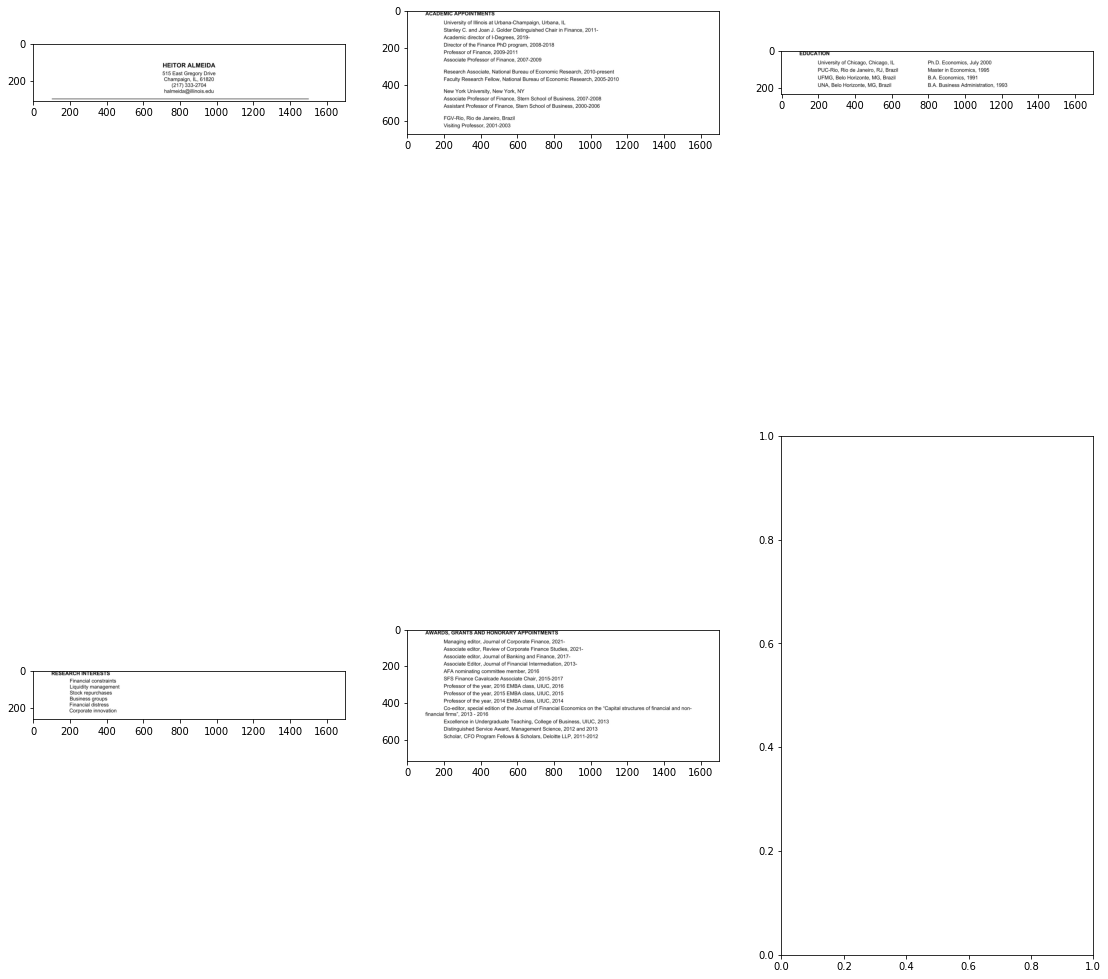

In [ ]:
for imgId in coco.getImgIds(catIds=catIds)[:1]:
    imgIds = coco.getImgIds(imgIds = [imgId])
    img = coco.loadImgs(imgIds[0])[0]
    img['file_name'] = img['file_name'].replace('\\', '/')
    try:
      image = Image.open(img['file_name'])
    except:
      continue
    image = np.asarray(image)

    analysis, raw_output = analyze_image(image)
    preds = raw_output.pred_boxes
    scores = raw_output.scores
    classes = raw_output.pred_classes
    labels = _create_text_labels(classes.tolist(), scores, ['text', 'title', 'list', 'table', 'figure'])
    preds_np = preds.tensor.detach().numpy()
    title_indices = get_title_indices(classes.tolist(), scores)
    pred_boxes = [preds_np[title_indices[i]] for i in range(len(title_indices))]
    pred_boxes = FilterTitleBboxesW2V(pred_boxes, image.shape[0]/2, image)
sections = divide_image(image, pred_boxes)
print(np.array(sections).shape)
fig, axes = plt.subplots(2, math.ceil(len(sections)/2), figsize=(19, 21))
axes = np.ravel(axes)
for i, section in enumerate(sections):
  axes[i].imshow(section)

plt.show()

In [ ]:
%cd /content/gdrive/MyDrive/Resume_Info_Extraction/SectionDivider

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/Resume_Info_Extraction/SectionDivider'
/content


In [ ]:
!ls

Base-RCNN-FPN.yml  config.py  config.yml  ditod  __pycache__  SectionDivider.py


In [ ]:
from SectionDivider import SectionDivider

In [ ]:
sec_divide = SectionDivider()

Instance of Section Divider created


In [ ]:
from PIL import Image
import numpy as np
from numpy import asarray
image = Image.open('/content/gdrive/MyDrive/Resume_Info_Extraction/title_annotated/images/4-1_d89e.jpg')
image = np.asarray(image)

In [ ]:
sections, texts = sec_divide.GetSections(image)

In [ ]:
len(sections), texts

(4, ['EDUCATION', 'HoNORS', 'PUBLICATIONS'])

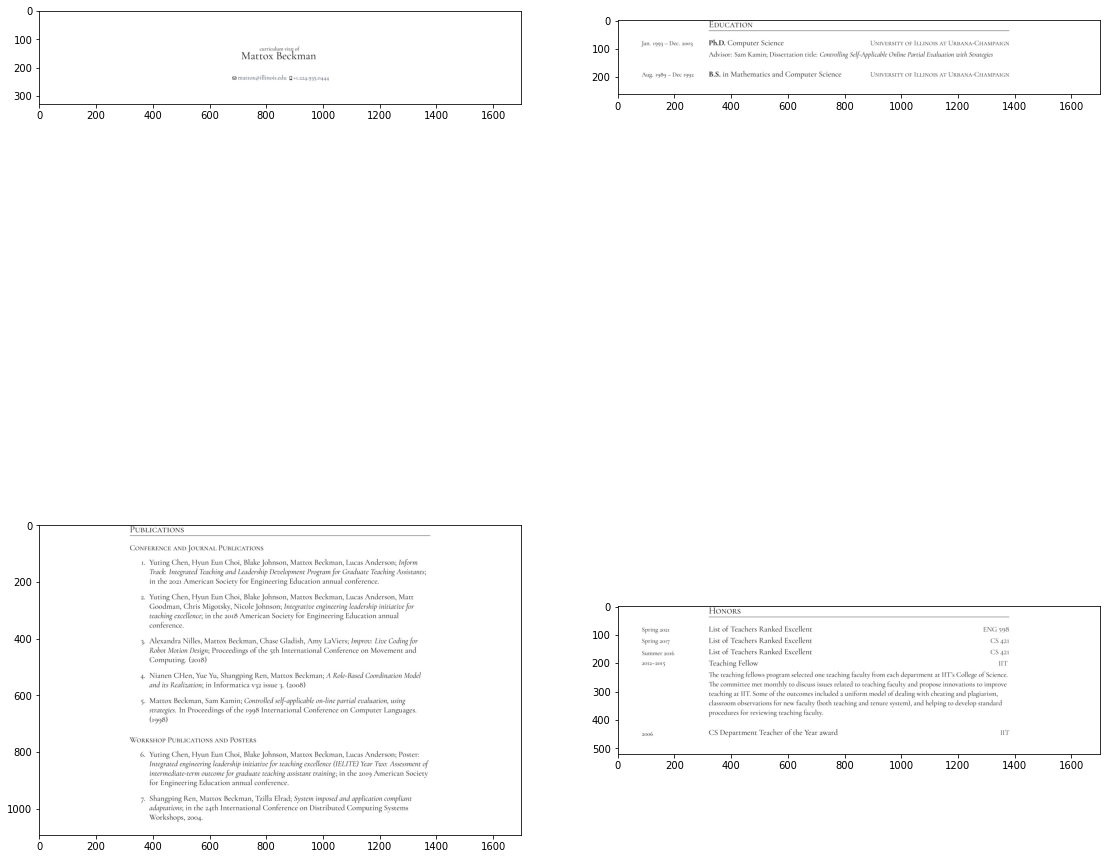

In [ ]:
import matplotlib.pyplot as plt
import math
fig, axes = plt.subplots(2, math.ceil(len(sections)/2), figsize=(19, 21))
axes = np.ravel(axes)
for i, section in enumerate(sections):
  axes[i].imshow(section)

plt.show()